# Introduction to Latent Dirichlet Allocation
---

## What is LDA?

Latent Dirichlet allocation is a type of **topic modeling**. A topic model is a statistical model of what themes appear in a collection of documents.

Imagine you have a collection of webpages from a pet care website. Each webpage is considered a document. Each document is about different things. One webpage might be about picking a good veterinarian, and another webpage might be about vaccination schedules for your pets.

This pet care website might discuss lots of different types of pets. One webpage might be mostly about dogs, but it mentions cats, too. Another webpage might be mostly about reptiles, but also about amphibians and insects.

We can think of each type of pet as a potential topic. Some webpages might be 80% about dogs and 20% about cats, and others might be 75% about reptiles, 10% about cats, 10% about dogs, and 5% about insects.

LDA infers the underlying (latent!) topics in a collection of documents. It is unsupervised because there is no set `y`. The number of topics to search for is a hyperparameter we can tune, and it's up to the modeler to interpret the results.

---

## How does it work?

LDA pretends each document is generated in the following way:

1. Choose N ∼ Poisson(ξ).
2. Choose θ ∼ Dir(α).
3. For each of the $N$ words $w_n$:
    * Choose a topic $z_n$ ∼ Multinomial($\theta$).
    
    * Choose a word wn from $p(w_n | z_n ,\beta)$, a multinomial probability conditioned on the topic $z_n$.

(Source: [Latent Dirichlet Allocation](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf).)

Or,

1. Choose a number of words that the document will have.
2. Choose a θ, which is the topic-document distribution. What percentage is the document "built from" various topics?
3. For each word in the document:
    * Choose a topic according to the topic-document distribution.
    * Choose a word from the topic, according to the probabilities of words from that topic.
    
Each topic is a distribution across words. **Every word appears in every topic, but with a different probability.**

Since LDA is pretending each document is generated this way, it can reverse-engineer the topics and the word-probabilities per topic.

---

## Codealong:

We're going to topic model on Donald Trump's tweets from about the last year.

## Imports:

(pip install libraries if you are missing them - most likey `pyLDAvis` )

[pypi for pyLDAvis](https://pypi.org/project/pyLDAvis/)

In [2]:
# import twitter 
import re
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import numpy as np
import pandas as pd


from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation

from gensim import corpora, models
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)



In [3]:
# Lets load in our keys as variables below 
# with open('./twitter_keys.txt') as f:
#     ck, cs, atk, ats = f.read().split(',')

In [4]:
# These are mainly here for reference.  These are "my" application keys.  
# You should create your own using the Twitter developer portal

# import twitter, re, datetime, pandas as pd

# # your keys go here:
# twitter_keys = {
#     'consumer_key':        ck,
#     'consumer_secret':     cs,
#     'access_token_key':    atk,
#     'access_token_secret': ats
# }

# api = twitter.Api(
#     consumer_key         =   twitter_keys['consumer_key'],
#     consumer_secret      =   twitter_keys['consumer_secret'],
#     access_token_key     =   twitter_keys['access_token_key'],
#     access_token_secret  =   twitter_keys['access_token_secret']
# )


In [5]:
## pip install python-twitter

# class TweetMiner(object):

#     result_limit    =   20    
#     api             =   False
#     data            =   []
    
#     def __init__(self, keys_dict, api, result_limit = 20):
        
#         self.api = api
#         self.twitter_keys = keys_dict
        
#         self.result_limit = result_limit
        

#     def mine_user_tweets(self, user, mine_retweets=True, max_pages=5):
#         """
#         param: mine_retweets (boolean), you can implement this feature if you want to differentiate between retweets or not
#         """
#         data           =  []
#         last_tweet_id  =  False
#         page           =  1
        
#         while page <= max_pages:
            
#             if last_tweet_id:
#                 statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit,include_rts=mine_retweets,\
#                                                         max_id=last_tweet_id - 1)        
#             else:
#                 statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, include_rts=mine_retweets)
                
#             for item in statuses:

#                 mined = {
#                     'tweet_id':        item.id,
#                     'handle':          item.user.name,
#                     'retweet_count':   item.retweet_count,
#                     'text':            item.text,
#                     'mined_at':        datetime.datetime.now(),
#                     'created_at':      item.created_at,
#                 }
                
#                 last_tweet_id = item.id
#                 data.append(mined)
                
#             page += 1
            
#         return data

In [6]:
# miner = TweetMiner(twitter_keys, api, result_limit=200)

In [7]:
# data = miner.mine_user_tweets(user='realDonaldTrump', max_pages=20)
#pd.DataFrame(data).to_csv('../data/trump_tweets.csv', index=False)

In [8]:
# df = pd.DataFrame(data)

df = pd.read_csv('../data/trump_tweets.csv')

Preprocess Text
---

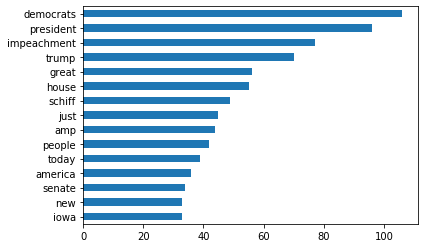

In [21]:
## Try initializing a count vectorizer

stops = list(ENGLISH_STOP_WORDS) + ['rt', 'https', 'realdonaldtrump']
cv = CountVectorizer(min_df=3, stop_words=stops)
vect = cv.fit_transform(df['text'])

df_vect = pd.DataFrame(vect.todense(), columns=cv.get_feature_names())

df_vect.sum().sort_values().tail(15).plot.barh();

In [11]:
## Explore common words - any words we suggest adding to stopwords? 

## Fit an LDA Model

In [23]:
lda = LatentDirichletAllocation(random_state=42, n_components=5)


In [24]:
lda.fit(df_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [36]:
#lda.fit(df_vect)
df_features = pd.DataFrame(lda.components_, columns=cv.get_feature_names()).T
df_features[3].sort_values(ascending=False).head(10)





president      34.159745
impeachment    32.941075
democrats      32.866697
house          28.417295
today          24.636119
amp            20.085675
gop            17.982462
senate         17.837015
just           17.486608
trump          17.257618
Name: 3, dtype: float64

### Examine Topics 

### Examine Probabilities 

In [37]:
# Let's get the unique tokens in each tweet
texts = [df_vect.columns[df_vect.loc[index,:].to_numpy().nonzero()] for index in df_vect.index]

In [38]:
dictionary = corpora.Dictionary(texts)


In [39]:
for text in texts[:5]:
    print(dictionary.doc2bow(text))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
[(4, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
[]
[(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(22, 1), (23, 1), (24, 1)]


In [40]:
corpus = [dictionary.doc2bow(text) for text in texts]


In [41]:
ldamodel = models.ldamodel.LdaModel(corpus,                     # pass in our corpus
                                    id2word = dictionary,       # matches each word to its "number" or "spot" in the dictionary
                                    num_topics = 5,             # number of topics T to find
                                    passes = 10,                 # number of passes through corpus; similar to number of epochs
                                    minimum_probability = 0.01) # only include topics above this probability threshold

In [42]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.036607  0.008951       1        1  23.086945
3      0.120908 -0.126486       2        1  22.469143
4     -0.136263  0.000052       3        1  19.744219
2     -0.097915 -0.034175       4        1  18.154039
1      0.076662  0.151657       5        1  16.545656, topic_info=    Category       Freq             Term      Total  loglift  logprob
20   Default  61.000000            trump  61.000000  30.0000  30.0000
2    Default  91.000000        democrats  91.000000  29.0000  29.0000
103  Default  46.000000            great  46.000000  28.0000  28.0000
39   Default  28.000000              new  28.000000  27.0000  27.0000
180  Default  42.000000           schiff  42.000000  26.0000  26.0000
..       ...        ...              ...        ...      ...      ...
8     Topic5   5.727537           senate  30.836346   0.1156  -4.8790
525   Topic5   4.509145  marshablackburn  11.486691   0.8640  -5.1182
314   Topic5   4.903365              gop  21.839916   0.3052  -5.0344
78    Topic5   4.549827              did  15.591063   0.5674  -5.1092
16    Topic5   4.832091        president  82.745377  -1.0414  -5.0490

[315 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
596       1  0.928801       17
598       1  0.892220       20
330       3  0.917098       25
111       5  0.863794       53
112       5  0.768387       95
...     ...       ...      ...
30        5  0.076320  working
31        1  0.108948    years
31        2  0.272369    years
31        3  0.599212    years
271       3  0.859818      yes

[486 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 3, 2])

### Trying with different n-gram values



In [43]:
## Try initializing a count vectorizer
stop = list(ENGLISH_STOP_WORDS)
stop.extend(['https','amp', 'realdonaldtrump', 'rt'])

cv2 = CountVectorizer(min_df=4 ,stop_words=stop, ngram_range=(2,2))


cv_arr2 = cv2.fit_transform(df['text'])

df_vect2 = pd.DataFrame(cv_arr2.toarray(), columns=cv2.get_feature_names())
df_vect2.head()

,17 witnesses,abuse power,adam schiff,al rimi,america great,american people,approval rating,big rally,crazy nancy,cryin chuck,...,rating republican,republican party,senator joe,state union,super bowl,united states,west virginia,white house,witch hunt,years ago
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_vect2.index

RangeIndex(start=0, stop=801, step=1)

In [49]:
texts2 = [df_vect2.columns[df_vect2.loc[index,:].to_numpy().nonzero() ] for index in df_vect2.index]
dictionary2 = corpora.Dictionary(texts2)
corpus2 = [dictionary2.doc2bow(text) for text in texts2]

ldamodel2 = models.ldamodel.LdaModel(corpus2,                     # pass in our corpus
                                    id2word = dictionary2,       # matches each word to its "number" or "spot" in the dictionary
                                    num_topics = 5,             # number of topics T to find
                                    passes = 20,                 # number of passes through corpus; similar to number of epochs
                                    minimum_probability = 0.01) # only include topics above this probability threshold

pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.304281  0.077289       1        1  23.178789
4     -0.178271  0.211107       2        1  21.965057
2     -0.096620  0.048454       3        1  21.171148
1     -0.077922 -0.277937       4        1  17.558310
3      0.048532 -0.058913       5        1  16.126703, topic_info=   Category       Freq              Term      Total  loglift  logprob
1   Default  17.000000   president trump  17.000000  30.0000  30.0000
12  Default  17.000000       adam schiff  17.000000  29.0000  29.0000
20  Default  13.000000      nancy pelosi  13.000000  28.0000  28.0000
3   Default  10.000000         fake news  10.000000  27.0000  27.0000
5   Default  10.000000     new hampshire  10.000000  26.0000  26.0000
..      ...        ...               ...        ...      ...      ...
20   Topic5   0.194086      nancy pelosi  13.501523  -2.4176  -5.6378
16   Topic5   0.194083  impeachment hoax  12.306747  -2.3249  -5.6378
37   Topic5   0.194077    house managers   7.610534  -1.8443  -5.6379
14   Topic5   0.194068          new york   6.193164  -1.6383  -5.6379
38   Topic5   0.194068   house democrats   7.610736  -1.8444  -5.6379

[238 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
43        4  0.906609           17 witnesses
50        5  0.895764            abuse power
12        1  0.935909            adam schiff
33        2  0.786478                al rimi
6         3  0.903894          america great
27        1  0.942499        american people
7         2  0.786479        approval rating
17        4  0.944208              big rally
9         2  0.786478            crazy nancy
15        3  0.905555            cryin chuck
31        1  0.727845         democrat party
25        5  0.840651       democratic party
48        1  0.700772  democrats impeachment
48        5  0.233591  democrats impeachment
30        4  0.944201         democrats want
21        4  0.906608           donald trump
3         5  0.945359              fake news
45        1  0.727830   foxandfriends schiff
38        2  0.919753        house democrats
37        2  0.919778         house managers
16        2  0.162512       impeachment hoax
16        3  0.812562       impeachment hoax
42        5  0.912884    impeachment process
41        1  0.727861       impeachment sham
35        4  0.906083      impeachment trial
24        4  0.944225              joe biden
40        1  0.856156            john bolton
26        1  0.398011              just like
26        2  0.597017              just like
28        3  0.904652         left democrats
46        3  0.811226             legal team
32        1  0.589300             looks like
32        5  0.196433             looks like
4         3  0.741996              mini mike
4         5  0.185499              mini mike
13        4  0.809192           mr president
20        2  0.962854           nancy pelosi
23        3  0.904661      national security
5         4  0.943543          new hampshire
14        3  0.807342               new york
39        4  0.906601   partisan impeachment
11        5  0.912878   paulsperry_ breaking
49        2  0.707055      president lawyers
47        3  0.904689        president legal
1         1  0.949377        president trump
29        3  0.942081           radical left
8         2  0.942411      rating republican
2         2  0.946516       republican party
18        3  0.904673            senator joe
22        4  0.906618            state union
34        5  0.840966             super bowl
0         5  0.872996          united states
19        3  0.942179          west virginia
10        2  0.968404            white house
44        1  0.714853             witch hunt
44        3  0.238284             witch hunt
36        3  0.904661              years ago, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC